# Predict a Student's performance

Importing the modules

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model

Loading data

In [5]:
DATA = pd.read_excel(r'C:\Users\rishi\Desktop\Programming\Python\Projects\Advanced Projects\StudentPerformanceML\student\student-mat.xlsx')

In [6]:
nDATA = np.transpose(DATA.to_numpy())

*Alloctation of Data*

Grades
- Normalised using Mean Normalization
$$\mu = \frac{1}{m}{\sum_{j=1}^{m}x_j}$$
$$x_j = \frac{x_j - \mu}{max-min}$$

In [7]:
Grades = nDATA[-1]
mu = np.mean(Grades)
Grades = (Grades-mu)/(np.max(Grades) - np.min(Grades))

School
- GP = 1
- MS = -1

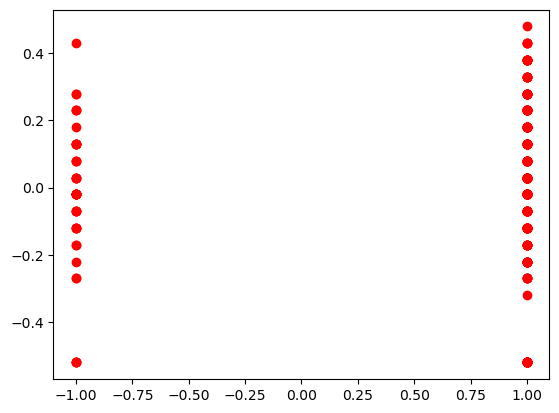

In [8]:
school = nDATA[0]
school[school == "GP"] = 1
school[school == "MS"] = -1
plt.scatter(school, Grades, c='r')

Biological Gender
- F = 1
- M = -1

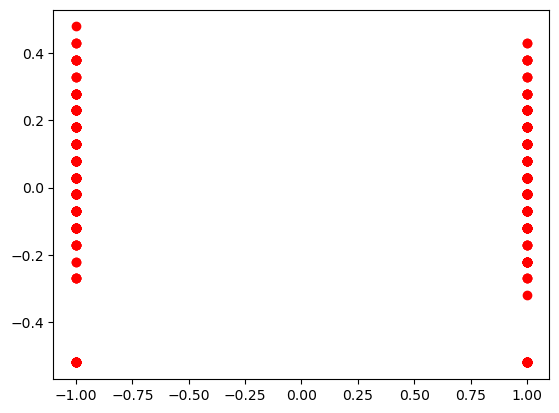

In [9]:
BGender = nDATA[1]
BGender[BGender == "F"] = 1
BGender[BGender == "M"] = -1
plt.scatter(BGender, Grades, c='r')

Age
- Normalised using Mean Normalization

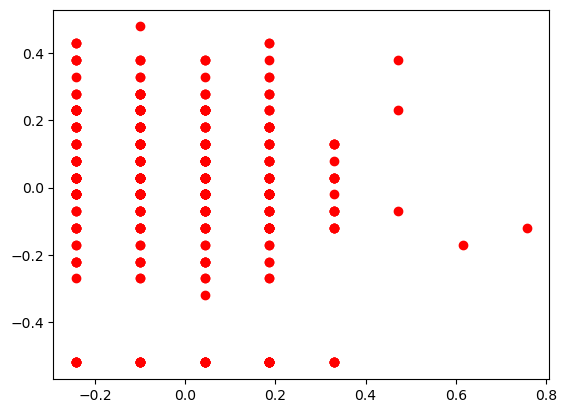

In [10]:
age = nDATA[2]
mu = np.mean(age)
age = (age - mu)/(np.max(age) - np.min(age))
plt.scatter(age, Grades, c='r')

Address
- Urban = 1
- Rural = -1

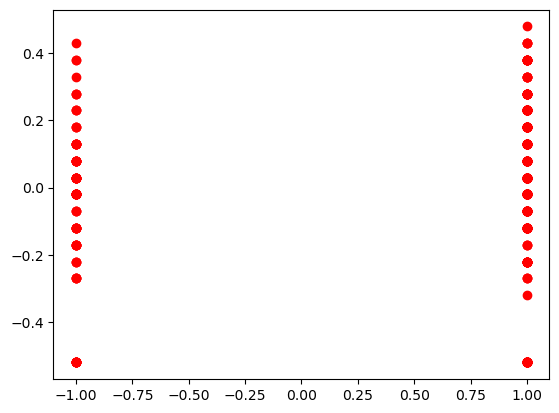

In [11]:
address = nDATA[3]
address[address == "U"] = 1
address[address == "R"] = -1
plt.scatter(address, Grades, c='r')

Family size
- Less than 3 = 1
- Greater than 3 = -1

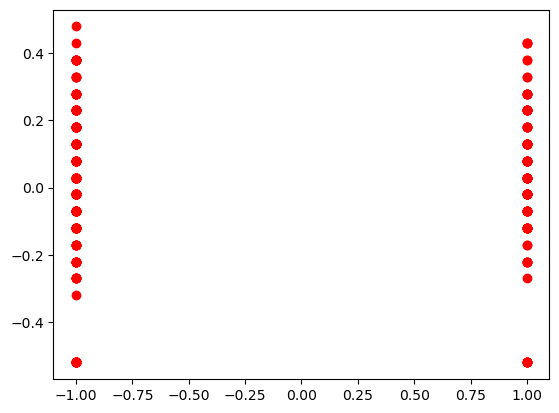

In [12]:
famsize = nDATA[4]
famsize[famsize == "LE3"] = 1
famsize[famsize == "GT3"] = -1
plt.scatter(famsize, Grades, c='r')

Parent's cohabitation status
- living together = 1
- living apart = -1

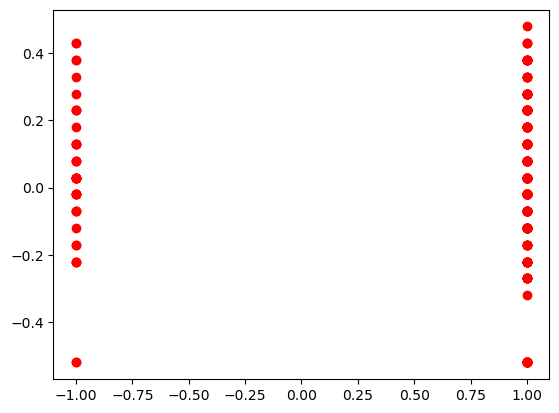

In [13]:
pstatus = nDATA[5]
pstatus[pstatus == "T"] = 1
pstatus[pstatus == "A"] = -1
plt.scatter(pstatus, Grades, c='r')

Mother's education
- Normalised by Mean Normalisation

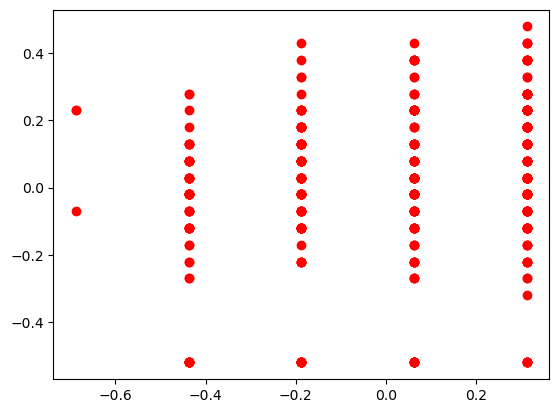

In [14]:
medu = nDATA[6]
mu = np.mean(medu)
medu = (medu-mu)/(np.max(medu) - np.min(medu))
plt.scatter(medu, Grades, c='r')

Father's education

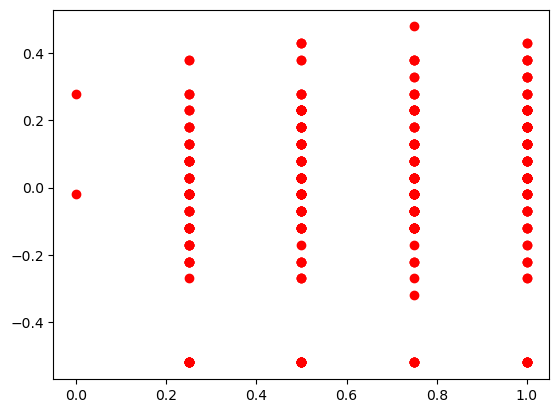

In [15]:
fedu = nDATA[7]
mu = np.mean(medu)
fedu = (fedu-mu)/(np.max(fedu) - np.min(fedu))
plt.scatter(fedu, Grades, c='r')

Mother's education
- teacher = -1
- health = -0.5
- services = 0
- at_home = 0.5
- other = 1

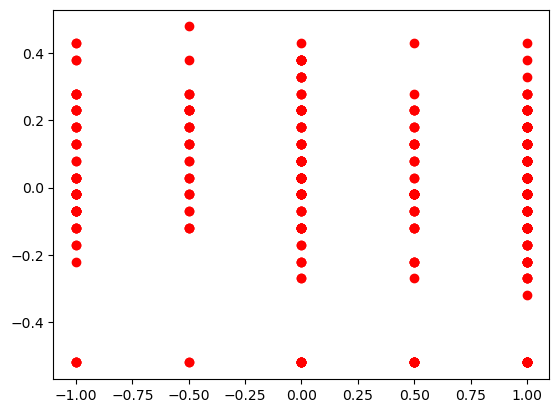

In [16]:
mjob = nDATA[8]
mjob[mjob == "teacher"] = -1
mjob[mjob == "health"] = -0.5
mjob[mjob == "services"] = 0
mjob[mjob == "at_home"] = 0.5
mjob[mjob == "other"] = 1
plt.scatter(mjob, Grades, c='r')

Father's education
- teacher = -1
- health = -0.5
- services = 0
- at_home = 0.5
- other = 1

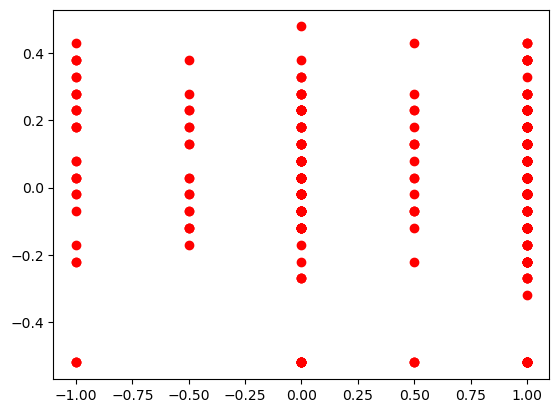

In [17]:
fjob = nDATA[9]
fjob[fjob == "teacher"] = -1
fjob[fjob == "health"] = -0.5
fjob[fjob == "services"] = 0
fjob[fjob == "at_home"] = 0.5
fjob[fjob == "other"] = 1
plt.scatter(fjob, Grades, c='r')

Reason for choosing this school
- home = -0.75
- reputation = -0.25
- course = 0.25
- other = 0.75

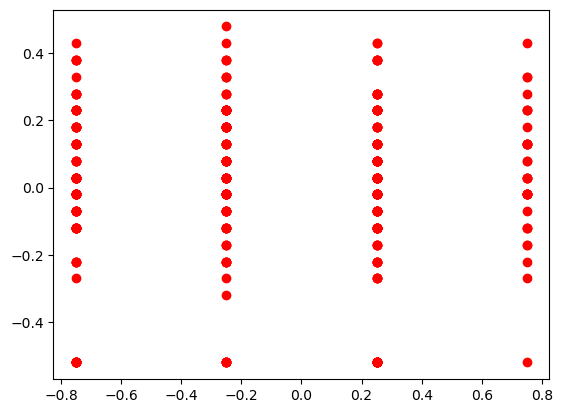

In [18]:
reason = nDATA[10]
reason[reason == "home"] = -0.75
reason[reason == "reputation"] = -0.25
reason[reason == "course"] = 0.25
reason[reason == "other"] = 0.75
plt.scatter(reason, Grades, c='r')

student's guardian
- mother = -1
- father = 0
- other = 1

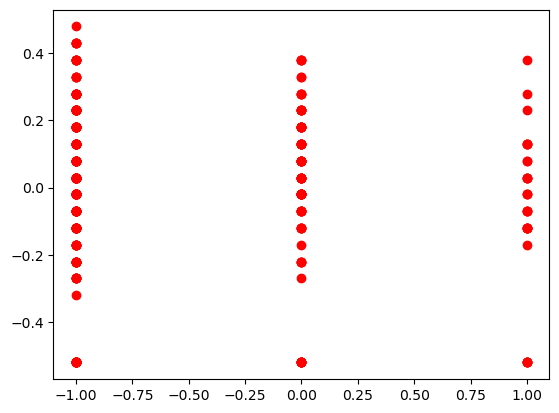

In [19]:
guardian = nDATA[11]
guardian[guardian == "mother"] = -1
guardian[guardian == "father"] = 0
guardian[guardian == "other"] = 1
plt.scatter(guardian, Grades, c='r')

TravelTime
- Normalized by Mean Normalization

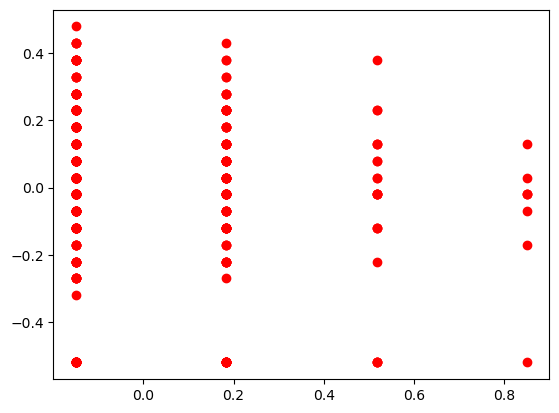

In [20]:
traveltime = nDATA[12]
mu = np.mean(traveltime)
traveltime = (traveltime-mu)/(np.max(traveltime) - np.min(traveltime))
plt.scatter(traveltime, Grades, c='r')

StudyTime
- Normalized using Mean Normalization

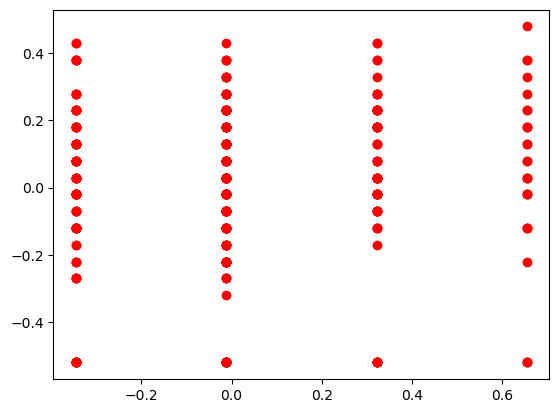

In [21]:
studytime = nDATA[13]
mu = np.mean(studytime)
studytime = (studytime-mu)/(np.max(studytime) - np.min(studytime))
plt.scatter(studytime, Grades, c='r')

Failures
- Normalized using Mean Normalization

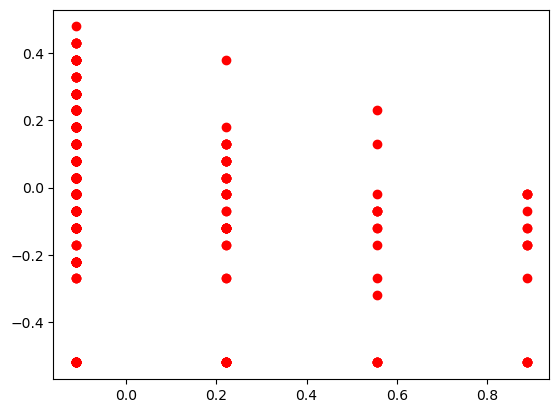

In [22]:
failures = nDATA[14]
mu = np.mean(failures)
failures = (failures-mu)/(np.max(failures) - np.min(failures))
plt.scatter(failures, Grades, c='r')

Extra Educational Suppport
- yes = -0.5
- no = 0.5

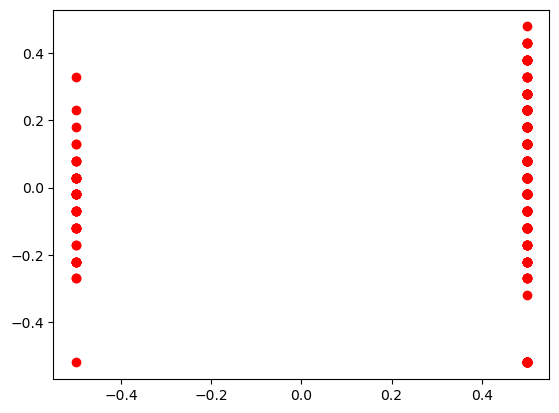

In [23]:
schoolsup = nDATA[15]
schoolsup[schoolsup == "yes"] = -0.5
schoolsup[schoolsup == "no"] = 0.5
plt.scatter(schoolsup, Grades, c='r')

Family education support
- yes = -0.5
- no = 0.5

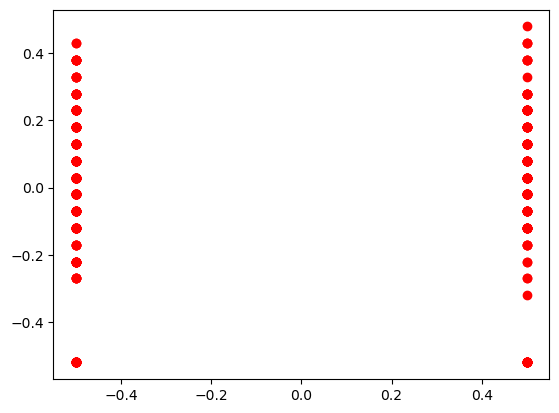

In [24]:
famsup = nDATA[16]
famsup[famsup == "yes"] = -0.5
famsup[famsup == "no"] = 0.5
plt.scatter(famsup, Grades, c='r')

Extra paid support
- yes = -0.5
- no = 0.5

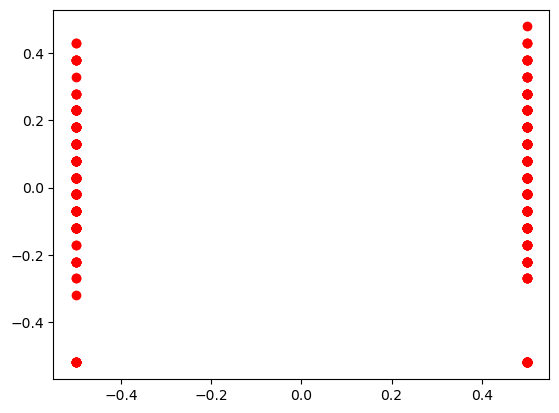

In [25]:
paid = nDATA[17]
paid[paid == "yes"] = -0.5
paid[paid == "no"] = 0.5
plt.scatter(paid, Grades, c='r')

Extra-curricular activities
- yes = -0.5
- no = 0.5

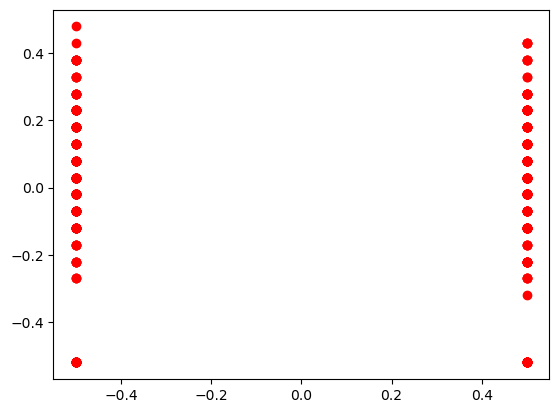

In [26]:
activities = nDATA[18]
activities[activities == "yes"] = -0.5
activities[activities == "no"] = 0.5
plt.scatter(activities, Grades, c='r')

Attended Nursery school
- yes = -0.5
- no = 0.5

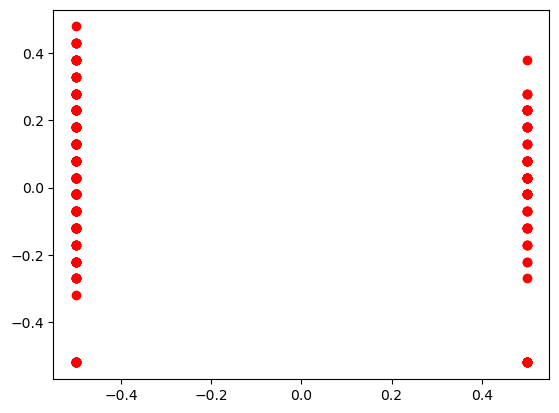

In [27]:
nursery = nDATA[19]
nursery[nursery == "yes"] = -0.5
nursery[nursery == "no"] = 0.5
plt.scatter(nursery, Grades, c='r')

Want's to go for higher education
- yes = -0.5
- no = 0.5

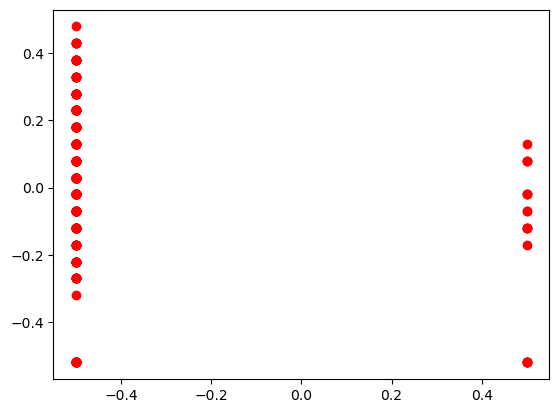

In [28]:
higher = nDATA[20]
higher[higher == "yes"] = -0.5
higher[higher == "no"] = 0.5
plt.scatter(higher, Grades, c='r')

Internet access at home
- yes = -0.5
- no = 0.5

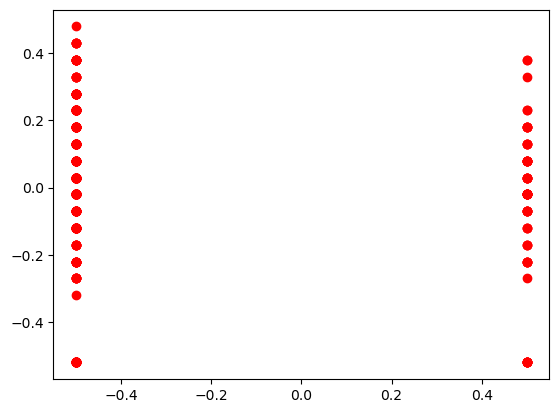

In [29]:
internet = nDATA[21]
internet[internet == "yes"] = -0.5
internet[internet == "no"] = 0.5
plt.scatter(internet, Grades, c='r')

With romantic relationship
- yes = -0.5
- no = 0.5

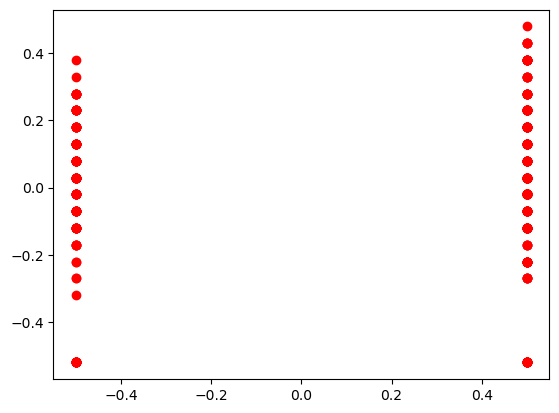

In [30]:
romantic = nDATA[22]
romantic[romantic == "yes"] = -0.5
romantic[romantic == "no"] = 0.5
plt.scatter(romantic, Grades, c='r')

Quality of family relationship
- Normalized by Mean Normalization

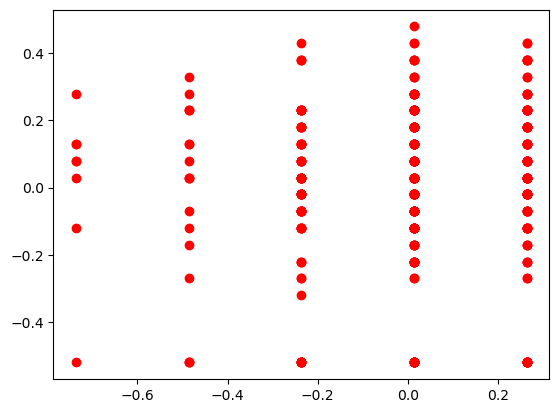

In [31]:
famrel = nDATA[23]
mu = np.mean(famrel)
famrel = (famrel - mu)/(np.max(famrel) - np.min(famrel))
plt.scatter(famrel, Grades, c='r')

Free time after school
- Normalized using Mean Normalization

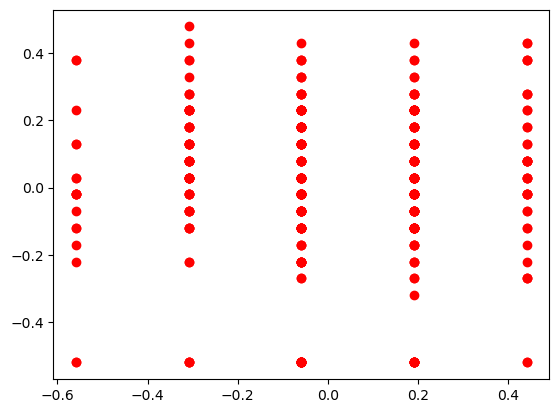

In [32]:
freetime = nDATA[24]
mu = np.mean(freetime)
freetime = (freetime - mu)/(np.max(freetime) - np.min(freetime))
plt.scatter(freetime, Grades, c='r')

Going out with friends
- Normalized using Mean Normalization

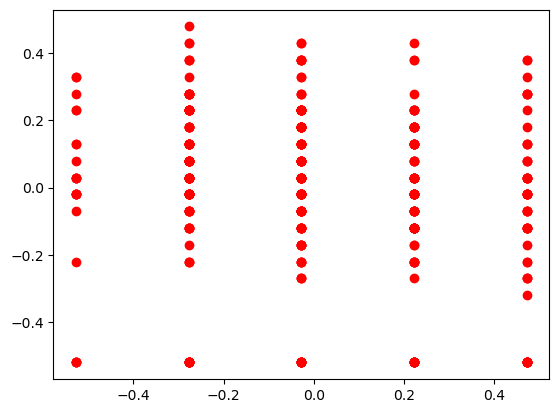

In [33]:
goout = nDATA[25]
mu = np.mean(goout)
goout = (goout - mu)/(np.max(goout) - np.min(goout))
plt.scatter(goout, Grades, c='r')

Workday Alcohol Consumption
- Normalized using Mean Normalization

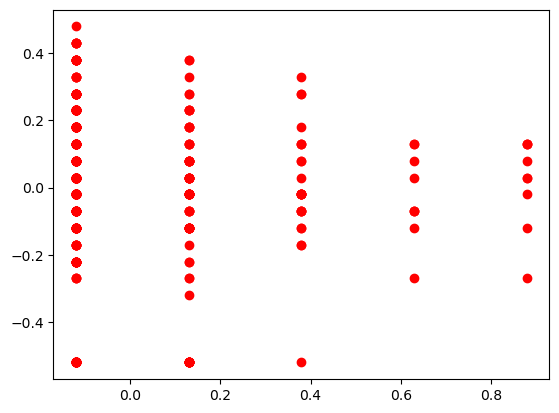

In [34]:
Dalc = nDATA[26]
mu = np.mean(Dalc)
Dalc = (Dalc - mu)/(np.max(Dalc) - np.min(Dalc))
plt.scatter(Dalc, Grades, c='r')

Weekend Alcohol Consumption
- Normalized using Mean Normalization

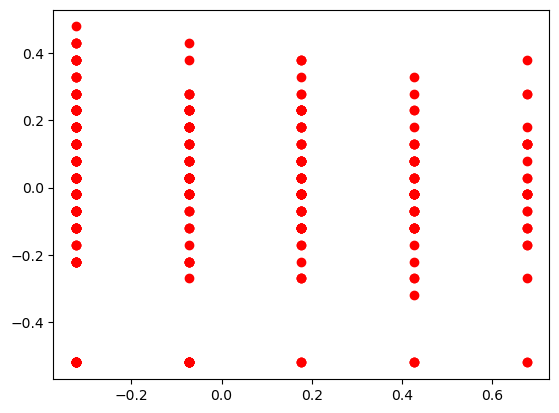

In [35]:
Walc = nDATA[27]
mu = np.mean(Walc)
Walc = (Walc - mu)/(np.max(Walc) - np.min(Walc))
plt.scatter(Walc, Grades, c='r')

Current Health status
- Normalized using Mean Normalizaton

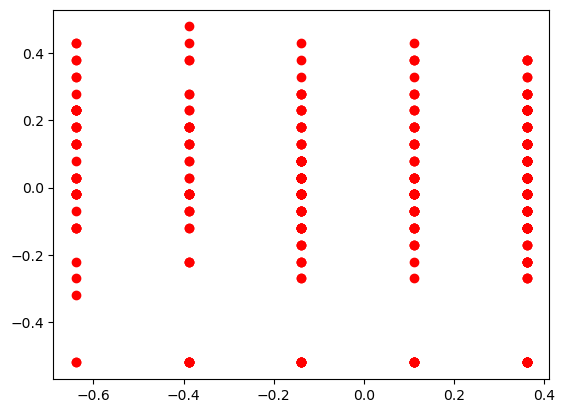

In [36]:
health = nDATA[28]
mu = np.mean(health)
health = (health - mu)/(np.max(health) - np.min(health))
plt.scatter(health, Grades, c='r')

Number of School Absences
- Normalized using Mean Normalization

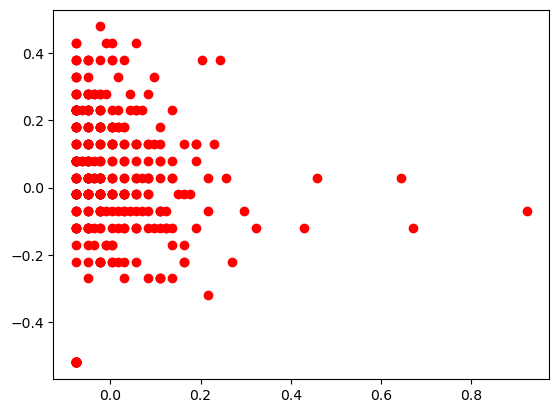

In [37]:
absences = nDATA[29]
mu = np.mean(absences)
absences = (absences - mu)/(np.max(absences) - np.min(absences))
plt.scatter(absences, Grades, c='r')

First period Grades
- Normalized using Mean Normalization

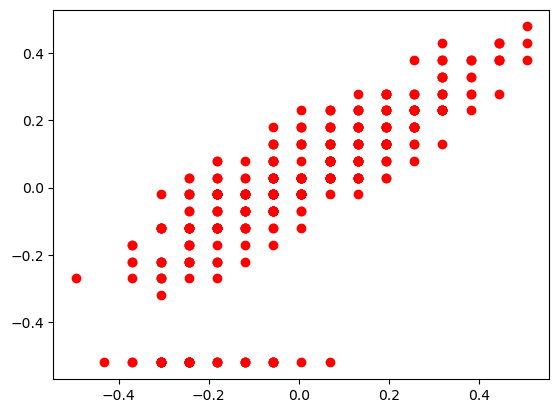

In [38]:
G1 = nDATA[30]
mu = np.mean(G1)
G1 = (G1 - mu)/(np.max(G1) - np.min(G1))
plt.scatter(G1, Grades, c='r')

Second period Grades
- Normalized using Mean Normalization

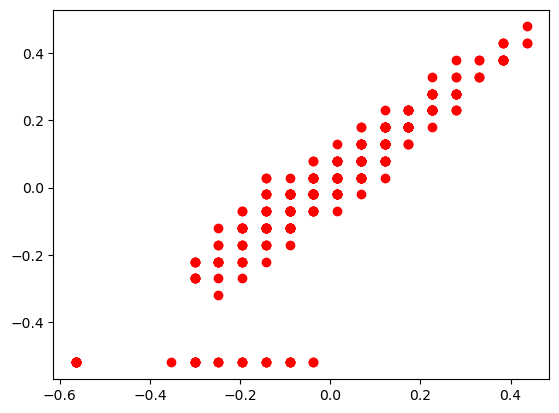

In [39]:
G2 = nDATA[31]
mu = np.mean(G2)
G2 = (G2 - mu)/(np.max(G2) - np.min(G2))
plt.scatter(G2, Grades, c='r')

In [40]:
x_train = [school, BGender, age, address, famsize, pstatus, medu, fedu, mjob, fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2]
x_train = np.array(x_train)
x_train = x_train.transpose()

In [41]:
y_train = Grades

In [42]:
lr_model = sklearn.linear_model.LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [51]:
y_pred = lr_model.predict(x_train)
w_fin = lr_model.coef_
w_fin.shape
b_fin = lr_model.intercept_
b_fin

0.029322422892279376

In [55]:
def final_model(x, w, b):
    return np.dot(x,w) + b
f_wb = final_model(x_train[0], w_fin, b_fin)
f_wb, y_train[0]

(-0.2561641326227777, -0.2207594936708861)